Questions for Divvy Data:

Points:
(1) Covid allegedly affected the number of bicyclists, because public transit was restricted and/or seen as dangerous. Many people tried to buy bicycles, but because of supply chain issues, many dealers couldn't get enough stock to satisify demand, so people may have turned to DIVVY as a stopgap measure.

(2) Covid also drastically reducted tourism throughout the summer of 2020, especially in Chicago, which had strong public health directives requiring masking.

Questions:
A) From 2019 to 2020, did Divvy use drop (because of business shut-downs) or increase (because people wanted to bike rather than public transit)? 

A1) Did the path of bike usage shift? (How to measure this? Aggregrate where bikes went from given stations?)

B) Did the proportion of "casual" (=non-member) users drop (#2) in 2020? Did it pick up in 2021?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def getData(year,months=['01','02','03','04','05','06','07','08','09','10','11','12']):
    # procedure accepts year (as string) and optional list of months (strings) for which to retreive data
    # will return a df with the DIVVY data for that year and month(s)
    import pandas as pd

    if not isinstance(year,str):
        year = str(year)

    if not isinstance(months,list):
        months = [months]

    if int(year) >= 2020:
        workDir = '/home/alp/Google Drive/Python/DataSets/Data_Divvy/'
    else:
        workDir = '/home/alp/Google Drive/Python/DataSets/Data_Divvy/pre2020/'

    fileName = year + months[0] + '-divvy-tripdata.json'
    print(fileName)
    retData = pd.read_json(workDir+fileName,orient='index')

    if len(months) > 0:
        for month in months[1:]:
                fileName = year + month + '-divvy-tripdata.json'
                print(fileName)
                newData = pd.read_json(workDir+fileName,orient='index')
                retData = pd.concat([retData,newData])

    return retData
       

In [5]:
d2012 = getData('2020',['12'])

202012-divvy-tripdata.json


In [7]:
d2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131573 entries, 0 to 131572
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             131573 non-null  object        
 1   rideable_type       131573 non-null  object        
 2   started_at          131573 non-null  datetime64[ns]
 3   ended_at            131573 non-null  datetime64[ns]
 4   start_station_name  119874 non-null  object        
 5   start_station_id    119874 non-null  object        
 6   end_station_name    118336 non-null  object        
 7   end_station_id      118336 non-null  object        
 8   start_lat           131573 non-null  float64       
 9   start_lng           131573 non-null  float64       
 10  end_lat             131462 non-null  float64       
 11  end_lng             131462 non-null  float64       
 12  member_casual       131573 non-null  object        
dtypes: datetime64[ns](2), float64

In [8]:
d2012['tripduration'] = d2012['ended_at'] - d2012['started_at']
problems = d2012[d2012['tripduration'] < '0:00:00']
problems.size

6076

In [9]:
problems.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration
125,B7DF480FC433DA00,electric_bike,2020-12-15 11:48:35,2020-11-25 13:21:43,None,None,None,None,41.78,-87.60,41.79,-87.60,member,-20 days +01:33:08
136,923B69F36CE1E2D3,electric_bike,2020-12-15 11:50:32,2020-11-25 14:06:37,None,None,None,None,41.90,-87.69,41.90,-87.69,member,-20 days +02:16:05
681,4804C00B5CA844EA,electric_bike,2020-12-15 12:05:43,2020-11-25 20:20:05,None,None,None,None,41.80,-87.59,41.80,-87.60,member,-20 days +08:14:22
1190,D343E9446089AAF2,electric_bike,2020-12-15 12:11:41,2020-11-25 20:03:07,None,None,None,None,41.93,-87.71,41.92,-87.71,casual,-20 days +07:51:26
1703,6E67A4AAB95CA751,electric_bike,2020-12-15 12:15:37,2020-11-25 16:38:59,None,None,None,None,41.88,-87.65,41.87,-87.65,casual,-20 days +04:23:22


In [10]:
print('before:',len(d2012))
d2012.drop(d2012[d2012['tripduration'] < '0:00:00'].index, inplace=True)
print('after: ',len(d2012))

before: 131573
after:  131139


In [15]:
d2012.describe()

,start_lat,start_lng,end_lat,end_lng,tripduration
count,131139.000000,131139.000000,131029.000000,131029.000000,131139
mean,41.902591,-87.646768,41.902677,-87.646951,0 days 00:15:58.480627425
std,0.046453,0.026926,0.046402,0.026942,0 days 01:14:12.635927595
min,41.650000,-87.780000,41.650000,-87.790000,0 days 00:00:00
25%,41.881690,-87.661206,41.881892,-87.661406,0 days 00:05:45
50%,41.898221,-87.643909,41.898259,-87.644098,0 days 00:09:48
75%,41.930000,-87.629634,41.930000,-87.629634,0 days 00:17:27
max,42.070000,-87.528232,42.070000,-87.528232,6 days 18:20:59


In [3]:
data19 = getData('2019')
data19.shape

201901-divvy-tripdata.json
201902-divvy-tripdata.json
201903-divvy-tripdata.json
201904-divvy-tripdata.json
201905-divvy-tripdata.json
201906-divvy-tripdata.json
201907-divvy-tripdata.json
201908-divvy-tripdata.json
201909-divvy-tripdata.json
201910-divvy-tripdata.json
201911-divvy-tripdata.json
201912-divvy-tripdata.json


(3818004, 16)

In [3]:
data20 = getData('2020')
data20.shape

202001-divvy-tripdata.json
202002-divvy-tripdata.json
202003-divvy-tripdata.json
202004-divvy-tripdata.json
202005-divvy-tripdata.json
202006-divvy-tripdata.json
202007-divvy-tripdata.json
202008-divvy-tripdata.json
202009-divvy-tripdata.json
202010-divvy-tripdata.json
202011-divvy-tripdata.json
202012-divvy-tripdata.json


(3541683, 13)

In [ ]:
data20.drop(columns=['ride_id', 'rideable_type', 'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id'],inplace=True)
data20.rename(columns={'started_at':'start_time','ended_at':'end_time','member_casual':'usertype'},inplace=True)
data20['tripduration'] = data20['end_time'] - data20['start_time']


In [5]:
data20.head()

,start_time,end_time,start_lat,start_lng,end_lat,end_lng,usertype,tripduration
99279,2020-01-01 00:04:44,2020-01-01 00:17:08,41.9363,-87.6527,41.9561,-87.6688,casual,0 days 00:12:24
143776,2020-01-01 00:10:37,2020-01-01 00:10:54,41.8842,-87.6296,41.8842,-87.6296,member,0 days 00:00:17
143777,2020-01-01 00:11:14,2020-01-01 00:15:32,41.8842,-87.6296,41.8763,-87.6292,member,0 days 00:04:18
39811,2020-01-01 00:11:27,2020-01-01 00:13:15,41.9542,-87.6544,41.9528,-87.6500,member,0 days 00:01:48
94468,2020-01-01 00:12:34,2020-01-01 00:14:29,41.8675,-87.6322,41.8672,-87.6260,member,0 days 00:01:55


In [6]:
data20.describe()

,start_lat,start_lng,end_lat,end_lng,tripduration
count,3.541683e+06,3.541683e+06,3.537428e+06,3.537428e+06,3541683
mean,4.190376e+01,-8.764483e+01,4.190401e+01,-8.764509e+01,0 days 00:24:50.050446637
std,4.287934e-02,2.532487e-02,4.299847e-02,2.545005e-02,0 days 07:20:22.141436886
min,4.164000e+01,-8.787000e+01,4.154000e+01,-8.789000e+01,-21 days +19:50:02
25%,4.188213e+01,-8.765875e+01,4.188220e+01,-8.765889e+01,0 days 00:07:38
50%,4.189875e+01,-8.764119e+01,4.189897e+01,-8.764170e+01,0 days 00:14:04
75%,4.192950e+01,-8.762775e+01,4.192955e+01,-8.762780e+01,0 days 00:25:56
max,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01,108 days 15:30:24


In [7]:
prob = data20[data20['tripduration'] < '0:00:00']
prob.head()

,start_time,end_time,start_lat,start_lng,end_lat,end_lng,usertype,tripduration
155332,2020-02-28 10:09:43,2020-02-28 10:09:42,41.8899,-87.6803,41.8899,-87.6803,casual,-1 days +23:59:59
403763,2020-03-06 09:32:54,2020-03-06 09:32:52,41.8899,-87.6803,41.8899,-87.6803,casual,-1 days +23:59:58
365429,2020-03-09 14:02:50,2020-03-09 14:02:46,41.8899,-87.6803,41.8899,-87.6803,casual,-1 days +23:59:56
313192,2020-03-10 13:02:39,2020-03-10 13:02:28,41.8899,-87.6803,41.8899,-87.6803,casual,-1 days +23:59:49
304559,2020-03-10 13:10:45,2020-03-10 13:10:33,41.8899,-87.6803,41.8899,-87.6803,casual,-1 days +23:59:48


In [8]:
prob.describe()

,start_lat,start_lng,end_lat,end_lng,tripduration
count,10665.000000,10665.000000,10639.000000,10639.000000,10665
mean,41.905145,-87.640899,41.905472,-87.642753,-1 days +07:05:44.387998125
std,0.038737,0.021870,0.039757,0.022618,3 days 16:05:51.065799012
min,41.691300,-87.774446,41.700000,-87.774446,-21 days +19:50:02
25%,41.884241,-87.652310,41.883668,-87.654020,-1 days +23:59:35
50%,41.900363,-87.636829,41.899930,-87.638973,-1 days +23:59:47
75%,41.929499,-87.626761,41.930585,-87.627691,-1 days +23:59:54
max,42.064313,-87.552812,42.064854,-87.549386,-1 days +23:59:59


In [9]:
len(prob)/len(data20)*100

0.3011280230331173

In [10]:
b = len(data20)

print('before:',b)
data20.drop(data20[data20['tripduration'] < '0:00:00'].index, inplace=True)
print('after: ',len(data20))
print('dropped = ',b-len(data20),(b-len(data20))/b*100)

before: 3541683
after:  3472163
dropped =  69520 1.9629085945862461


In [11]:
data20.describe()

,start_lat,start_lng,end_lat,end_lng,tripduration
count,3.472163e+06,3.472163e+06,3.467989e+06,3.467989e+06,3472163
mean,4.190376e+01,-8.764484e+01,4.190401e+01,-8.764510e+01,0 days 00:27:59.318281428
std,4.288855e-02,2.533557e-02,4.300561e-02,2.545964e-02,0 days 05:27:51.571191068
min,4.164000e+01,-8.787000e+01,4.154000e+01,-8.789000e+01,0 days 00:00:00
25%,4.188213e+01,-8.765875e+01,4.188220e+01,-8.765890e+01,0 days 00:07:41
50%,4.189877e+01,-8.764120e+01,4.189897e+01,-8.764170e+01,0 days 00:14:07
75%,4.192950e+01,-8.762775e+01,4.192955e+01,-8.762780e+01,0 days 00:25:59
max,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01,108 days 15:30:24


In [12]:
data20['month'] = pd.DatetimeIndex(data20['start_time']).month
data20['year'] = pd.DatetimeIndex(data20['start_time']).year

In [13]:
d20_pivot = data20.pivot_table(index=['month'],columns=['year','usertype'],values='tripduration',aggfunc = ['mean'])
d20_pivot

mean                          
year                          2020                          
usertype                    casual                    member
month                                                       
1        0 days 02:44:14.224495148 0 days 00:11:07.096063145
2        0 days 02:07:52.678551576 0 days 00:12:50.609336232
3        0 days 01:03:19.231369531 0 days 00:14:21.617471652
4        0 days 01:13:34.635799543 0 days 00:21:33.099462052
5        0 days 00:51:04.373642790 0 days 00:19:46.572813782
6        0 days 00:51:49.666778984 0 days 00:18:43.822416563
7        0 days 00:59:44.317448142 0 days 00:17:46.309840372
8        0 days 00:44:59.836589953 0 days 00:16:50.276789156
9        0 days 00:38:11.977702133 0 days 00:15:33.097594490
10       0 days 00:30:15.354670830 0 days 00:14:02.341403636
11       0 days 00:31:50.813087034 0 days 00:13:35.213734987
12       0 days 00:26:55.189357735 0 days 00:12:44.148956738

In [5]:
data21 = getData('2021')

202101-divvy-tripdata.json
202102-divvy-tripdata.json
202103-divvy-tripdata.json
202104-divvy-tripdata.json
202105-divvy-tripdata.json
202106-divvy-tripdata.json
202107-divvy-tripdata.json
202108-divvy-tripdata.json
202109-divvy-tripdata.json
202110-divvy-tripdata.json
202111-divvy-tripdata.json
202112-divvy-tripdata.json


In [7]:
data21.shape

(5595063, 13)

In [8]:
data19.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'start_lat',
       'start_lng', 'end_lat', 'end_lng'],
      dtype='object')

In [9]:
data20.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In 2020, Divvy changed the sort of information it collected. For this analysis, let's drop the columns we don't care about and combine the two DFs.

Eliminate: 2019: ride_id, bikeid, from_station_id, from_station_name, to_station_id, to_station_name, gender, birthyear
    2020: ride_id, ridable_type, start_station_name, start_station_id, end_station_name, end_station_id

Rename: 2020: started_at -> start_time, ended_at -> end_time

Finally, for some rows, the end time is before the start time. This results in negative "tripduration" values. These errors seem to be when bikes are removed or added to the system (the station ID fields are often blank or the start and end locations are identical). In any case, they represent a very small proportion of the total number of rows, so we will just drop them.

In [6]:
data19.drop(columns = ['trip_id', 'bikeid', 'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'gender', 'birthyear','tripduration'],inplace=True)
data19['tripduration'] = data19['end_time'] - data19['start_time']

print('before:',len(data19))
data19.drop(data19[data19['tripduration'] < '0:00:00'].index, inplace=True)
print('after: ',len(data19))


before: 3818004
after:  3817965


In [8]:
data20.drop(columns=['ride_id', 'rideable_type', 'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id'],inplace=True)
data20.rename(columns={'started_at':'start_time','ended_at':'end_time','member_casual':'usertype'},inplace=True)
data20['tripduration'] = data20['end_time'] - data20['start_time']

b = len(data20)

print('before:',b)
data20.drop(data20[data20['tripduration'] < '0:00:00'].index, inplace=True)
print('after: ',len(data20))
print('dropped = ',b-len(data20),(b-len(data20))/b*100)

before: 3817965
after:  3472163
dropped =  345802


In [9]:
data21.drop(columns=['ride_id', 'rideable_type', 'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id'],inplace=True)
data21.rename(columns={'started_at':'start_time','ended_at':'end_time','member_casual':'usertype'},inplace=True)
data21['tripduration'] = data21['end_time'] - data21['start_time']

b = len(data21)

print('before:',b)
data21.drop(data21[data21['tripduration'] < '0:00:00'].index, inplace=True)
print('after: ',len(data21))
print('dropped = ',b-len(data21))

before: 3817965
after:  5593819
dropped =  -1775854


In [10]:
print('change from 19 to 20 ',(len(data20) - len(data19))/len(data19) )
print('change from 20 to 21 ',(len(data21) - len(data20))/len(data20) )

change from 19 to 20  -0.09057233369085363
change from 20 to 21  0.611047350023602


In [11]:
bigData = pd.concat([data19,data20,data21],axis=0)
bigData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12883947 entries, 0 to 247539
Data columns (total 8 columns):
 #   Column        Dtype          
---  ------        -----          
 0   start_time    datetime64[ns] 
 1   end_time      datetime64[ns] 
 2   usertype      object         
 3   start_lat     float64        
 4   start_lng     float64        
 5   end_lat       float64        
 6   end_lng       float64        
 7   tripduration  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(1), timedelta64[ns](1)
memory usage: 884.7+ MB


In [12]:
bigData['month'] = pd.DatetimeIndex(bigData['start_time']).month
bigData['year'] = pd.DatetimeIndex(bigData['start_time']).year
# I added these to facilitate doing a pivot table based on year and month

In [45]:
pivot1920 = bigData.pivot_table(index='month',columns='year',values='start_lat',aggfunc = 'count')
pivot1920

year,2019,2020,2021
month,,,
1,103214,143884,96834
2,96146,139585,49622
3,165390,143418,228496
4,264690,84776,337230
5,366469,200274,531633
6,473985,343005,729595
7,555226,551480,822410
8,588101,622361,804352
9,491935,532958,756147


Text(0.5, 1.0, 'Number of Divvy rides per month in 2019, 2020, and 2021')

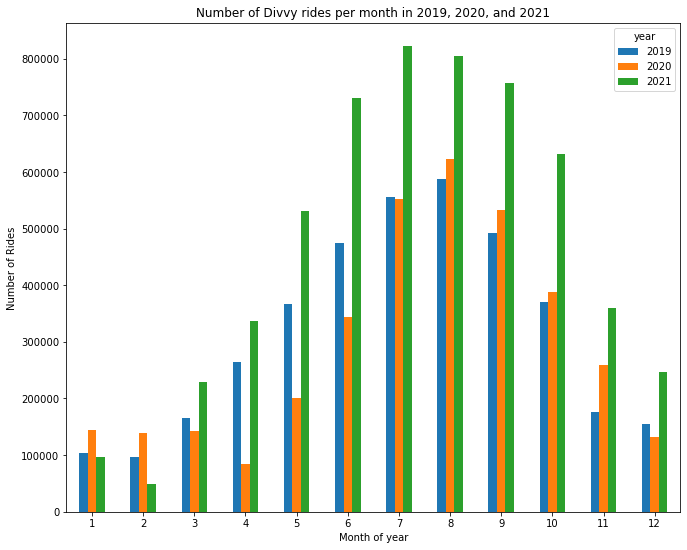

In [53]:
pivot1920.plot(kind = 'bar',figsize=(11,9))
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.ylabel('Number of Rides')
plt.xlabel('Month of year')
plt.title('Number of Divvy rides per month in 2019, 2020, and 2021')

Initially 2020 was shaping up to be a boom year for Divvy, but Covid shutdowns (or fear of using public bikes) hammered the number of riders in March - June. Ridership was about the same in July and was higher in 2020 than in 2019 for Aug thru Nov.

In [16]:
bigData['usertype'].replace(['Subscriber','Customer'],['member','casual'],inplace = True)

In [17]:
pivotCust = bigData.pivot_table(index=['month'],columns=['year','usertype'],values='start_time',aggfunc = 'count')
pivotCust

year        2019            2020            2021        
usertype  casual  member  casual  member  casual  member
month                                                   
1           4602   98670    7785  136099   18117   78717
2           2638   93548   12870  126715   10131   39491
3          15923  149688   27825  115593   84033  144463
4          47744  217566   23628   61148  136601  200629
5          81624  285834   86909  113365  256916  274717
6         130218  345177  154718  188287  370681  358914
7         175632  381683  269296  282184  442056  380354
8         186889  403295  289661  332700  412671  391681
9         129173  364046  230692  302266  363890  392257
10         71035  300751  145012  243641  257242  373984
11         18729  158447   88099  171617  106929  253049
12         16430  138662   30080  101493   69738  177802

In [20]:
pivotCustAnnual = bigData.pivot_table(index=['year'],columns = ['usertype'],values='start_time',aggfunc='count')
pivotCustAnnual

usertype,casual,member
year,,
2019,880637,2937367
2020,1366575,2175108
2021,2529005,3066058


Text(0.5, 0, 'Year')

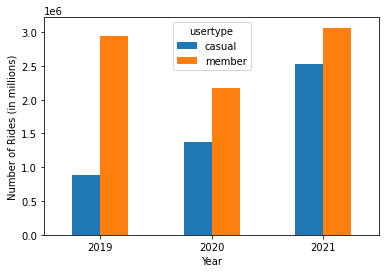

In [48]:
pivotCustAnnual.plot(kind ='bar')
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.ylabel('Number of Rides (in millions)')
plt.xlabel('Year')

Text(0, 0.5, 'Rides per month')

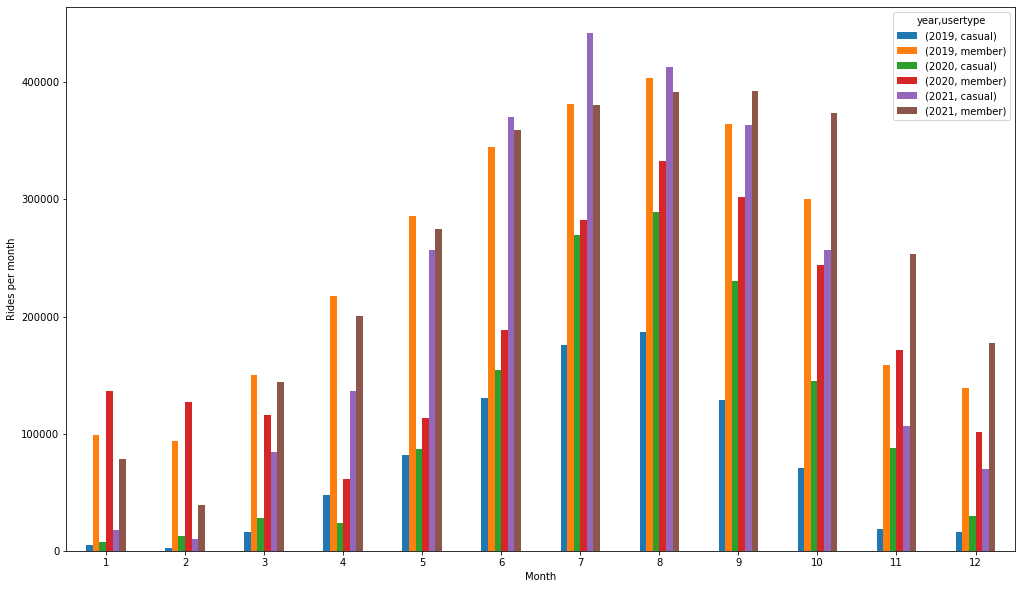

In [33]:
pivotCust.plot(kind = 'bar',figsize=(17,10))
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.xlabel('Month')
plt.ylabel('Rides per month')

<AxesSubplot:xlabel='month'>

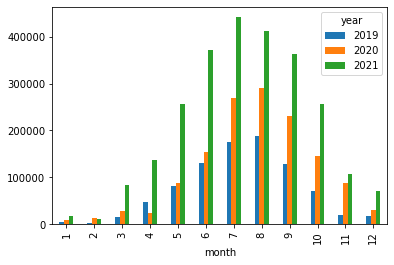

In [49]:
pivotCasual = bigData[bigData['usertype']== 'casual'].pivot_table(index=['month'],columns=['year'],values='start_time',aggfunc = 'count')


Text(0.5, 1.0, "Number of 'casual' Divvy rides per month")

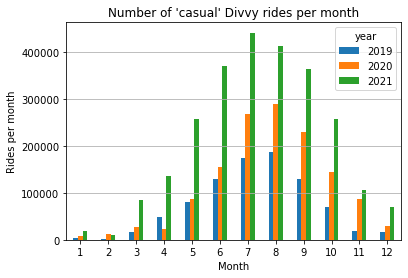

In [68]:
import numpy as np
pivotCasual.plot(kind='bar',figsize=(6,4))
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.xlabel('Month')
plt.ylabel('Rides per month')
plt.yticks(np.arange(0,450000,100000))
plt.grid(axis='y')
plt.title("Number of 'casual' Divvy rides per month")



Text(0.5, 1.0, "Number of 'member' Divvy rides per month")

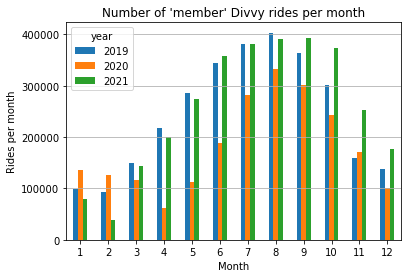

In [69]:
bigData[bigData['usertype']== 'member'].pivot_table(index=['month'],columns=['year'],values='start_time',aggfunc = 'count').plot(kind='bar',figsize=(6,4))
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.xlabel('Month')
plt.ylabel('Rides per month')
plt.yticks(np.arange(0,450000,100000))
plt.grid(axis='y')
plt.title("Number of 'member' Divvy rides per month")

In [34]:
pivotCust.columns

MultiIndex([(2019, 'casual'),
            (2019, 'member'),
            (2020, 'casual'),
            (2020, 'member'),
            (2021, 'casual'),
            (2021, 'member')],
           names=['year', 'usertype'])

Text(0, 0.5, 'Rides per month')

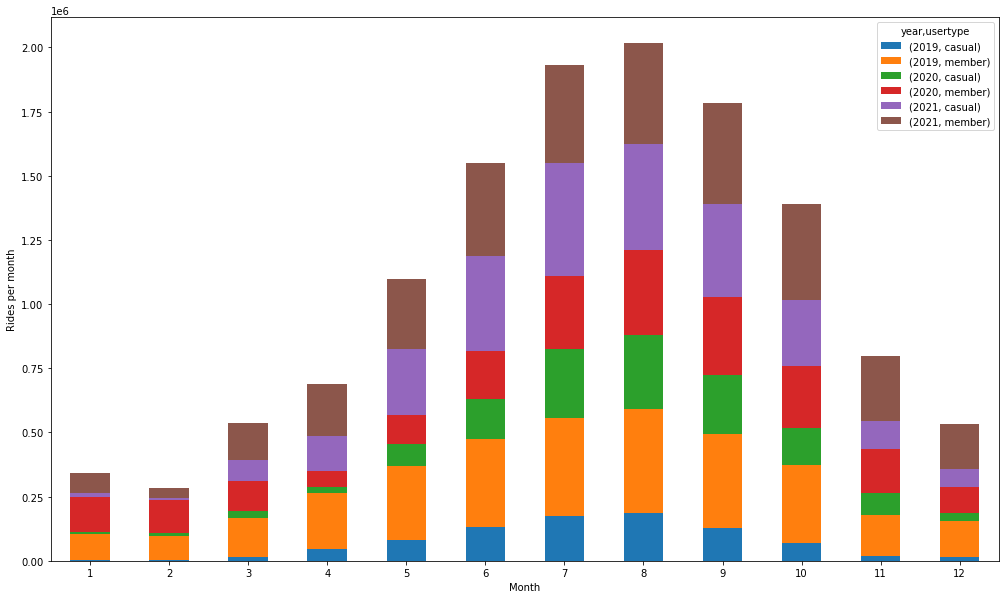

In [43]:
pivotCust.plot(kind = 'bar',stacked = True, figsize=(17,10))
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.xlabel('Month')
plt.ylabel('Rides per month')

The above chart shows that Divvy "members" were the main users of the system in 2019 (about 75% of all rides), but in 2020, "member" users were substantially lower from April through October (orange and red columns).

The number of "casual" users grew, especially after July (compare green and blue columns).

In [13]:
pivotTripDur = bigData.pivot_table(index=['month'],columns=['year','usertype'],values='tripduration',aggfunc = ['mean'])
pivotTripDur

mean                            \
year                          2019                             
usertype                  Customer                Subscriber   
month                                                          
1        0 days 00:47:19.483485441 0 days 00:15:39.002584372   
2        0 days 02:25:36.291129643 0 days 00:13:24.217332278   
3        0 days 00:52:18.354079005 0 days 00:13:02.420942226   
4        0 days 00:50:56.547147285 0 days 00:13:30.767528014   
5        0 days 00:51:14.379282038 0 days 00:13:51.001619872   
6        0 days 00:45:55.202391374 0 days 00:14:32.846478763   
7        0 days 00:59:47.058742811 0 days 00:16:25.998891718   
8        0 days 01:07:00.451342775 0 days 00:16:11.132429115   
9        0 days 00:51:40.002183118 0 days 00:14:07.838915961   
10       0 days 00:58:59.529020905 0 days 00:13:01.853250695   
11       0 days 01:07:01.965817443 0 days 00:12:25.924255238   
12       0 days 01:03:19.959403530 0 days 00:11:24.909838311   

                                                              \
year                          2020                             
usertype                    casual                    member   
month                                                          
1        0 days 02:44:14.224495148 0 days 00:11:07.096063145   
2        0 days 02:07:52.678551576 0 days 00:12:50.609336232   
3        0 days 01:03:19.231369531 0 days 00:14:21.617471652   
4        0 days 01:13:34.635799543 0 days 00:21:33.099462052   
5        0 days 00:51:04.373642790 0 days 00:19:46.572813782   
6        0 days 00:51:49.666778984 0 days 00:18:43.822416563   
7        0 days 00:59:44.317448142 0 days 00:17:46.309840372   
8        0 days 00:44:59.836589953 0 days 00:16:50.276789156   
9        0 days 00:38:11.977702133 0 days 00:15:33.097594490   
10       0 days 00:30:15.354670830 0 days 00:14:02.341403636   
11       0 days 00:31:50.813087034 0 days 00:13:35.213734987   
12       0 days 00:26:55.189357735 0 days 00:12:44.148956738   

                                                              
year                          2021                            
usertype                    casual                    member  
month                                                         
1        0 days 00:25:41.257605035 0 days 00:12:52.351548501  
2        0 days 00:49:22.716556422 0 days 00:18:01.486421441  
3        0 days 00:38:09.611343887 0 days 00:13:58.293254583  
4        0 days 00:38:01.419144838 0 days 00:14:41.359043773  
5        0 days 00:38:13.854795757 0 days 00:14:38.285042781  
6        0 days 00:37:07.396915853 0 days 00:14:40.668334062  
7        0 days 00:32:47.517742884 0 days 00:14:14.360705053  
8        0 days 00:28:47.273275245 0 days 00:14:06.110571742  
9        0 days 00:27:49.010798880 0 days 00:13:44.135761386  
10       0 days 00:28:40.507694879 0 days 00:12:30.120630862  
11       0 days 00:23:08.050588972 0 days 00:11:18.571239964  
12       0 days 00:23:29.724338745 0 days 00:11:00.294208980

In [14]:
pivotTripDur.describe()

mean                             \
year                           2019                              
usertype                   Customer                 Subscriber   
count                            12                         12   
mean      0 days 01:03:25.768668780  0 days 00:13:58.159505546   
std       0 days 00:26:52.418887968  0 days 00:01:31.068454133   
min       0 days 00:45:55.202391374  0 days 00:11:24.909838311   
25%       0 days 00:51:09.921248349  0 days 00:13:02.279019343   
50%       0 days 00:55:38.941549955  0 days 00:13:40.884573943   
75%       0 days 01:04:15.082388341  0 days 00:14:49.385505165   
max       0 days 02:25:36.291129643  0 days 00:16:25.998891718   

                                                                \
year                           2020                              
usertype                     casual                     member   
count                            12                         12   
mean      0 days 01:03:39.358291116  0 days 00:15:44.517156900   
std       0 days 00:41:41.899494578  0 days 00:03:11.954026761   
min       0 days 00:26:55.189357735  0 days 00:11:07.096063145   
25%       0 days 00:36:36.686548358  0 days 00:13:24.062635298   
50%       0 days 00:51:27.020210887  0 days 00:14:57.357533071   
75%       0 days 01:05:53.082477034  0 days 00:18:00.687984419   
max       0 days 02:44:14.224495148  0 days 00:21:33.099462052   

                                                                
year                           2021                             
usertype                     casual                     member  
count                            12                         12  
mean      0 days 00:32:36.528400116  0 days 00:13:48.836396927  
std       0 days 00:07:47.268081331  0 days 00:01:50.023383299  
min       0 days 00:23:08.050588972  0 days 00:11:00.294208980  
25%       0 days 00:27:17.072500418  0 days 00:12:46.793819091  
50%       0 days 00:30:47.395509064  0 days 00:14:02.201913162  
75%       0 days 00:38:03.467194600  0 days 00:14:38.880865601  
max       0 days 00:49:22.716556422  0 days 00:18:01.486421441

WTF is going on with the 2020 trip duration data? -1 days? It seems to be concentrated in the December 2020 data.

In [119]:
problems = bigData[bigData['tripduration'] < '0:00:00']
problems.size

108250

In [72]:
problems.head()

,start_time,end_time,usertype,start_lat,start_lng,end_lat,end_lng,tripduration,month,year
384478,2019-11-03 01:43:21,2019-11-03 01:09:56,casual,41.944540,-87.654678,41.889177,-87.638506,-1 days +23:26:35,11,2019
384483,2019-11-03 01:46:01,2019-11-03 01:10:44,casual,41.895465,-87.706128,41.938429,-87.698008,-1 days +23:24:43,11,2019
384485,2019-11-03 01:47:49,2019-11-03 01:02:40,member,41.943739,-87.664020,41.925563,-87.658404,-1 days +23:14:51,11,2019
384486,2019-11-03 01:48:04,2019-11-03 01:16:48,member,41.939532,-87.671114,41.939532,-87.671114,-1 days +23:28:44,11,2019
384487,2019-11-03 01:50:31,2019-11-03 01:04:25,member,41.956004,-87.680161,41.929465,-87.684158,-1 days +23:13:54,11,2019


In [74]:
dec2020 = getData('2020',['12'])

202012-divvy-tripdata.json


In [78]:
dec2020.shape

(131573, 13)

In [79]:
dec2020.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,70B6A9A437D4C30D,classic_bike,2020-12-27 12:44:29,2020-12-27 12:55:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Kinzie St,TA1306000003,41.877726,-87.654787,41.888716,-87.644448,member
1,158A465D4E74C54A,electric_bike,2020-12-18 17:37:15,2020-12-18 17:44:19,None,None,None,None,41.930000,-87.700000,41.910000,-87.700000,member
2,5262016E0F1F2F9A,electric_bike,2020-12-15 15:04:33,2020-12-15 15:11:28,None,None,None,None,41.910000,-87.690000,41.930000,-87.700000,member
3,BE119628E44F871E,electric_bike,2020-12-15 15:54:18,2020-12-15 16:00:11,None,None,None,None,41.920000,-87.700000,41.910000,-87.700000,member
4,69AF78D57854E110,electric_bike,2020-12-22 12:08:17,2020-12-22 12:10:59,None,None,None,None,41.800000,-87.590000,41.800000,-87.590000,member


In [80]:
dec2020.drop(columns=['ride_id', 'rideable_type', 'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id'],inplace=True)
dec2020.rename(columns={'started_at':'start_time','ended_at':'end_time','member_casual':'usertype'},inplace=True)
dec2020['tripduration'] = dec2020['end_time'] - dec2020['start_time']


In [81]:
dec2020.head()

,start_time,end_time,start_lat,start_lng,end_lat,end_lng,usertype,tripduration
0,2020-12-27 12:44:29,2020-12-27 12:55:06,41.877726,-87.654787,41.888716,-87.644448,member,0 days 00:10:37
1,2020-12-18 17:37:15,2020-12-18 17:44:19,41.930000,-87.700000,41.910000,-87.700000,member,0 days 00:07:04
2,2020-12-15 15:04:33,2020-12-15 15:11:28,41.910000,-87.690000,41.930000,-87.700000,member,0 days 00:06:55
3,2020-12-15 15:54:18,2020-12-15 16:00:11,41.920000,-87.700000,41.910000,-87.700000,member,0 days 00:05:53
4,2020-12-22 12:08:17,2020-12-22 12:10:59,41.800000,-87.590000,41.800000,-87.590000,member,0 days 00:02:42


In [84]:
problem2 = dec2020[dec2020['tripduration'] < '0:00:00']
len(problem2)

434

In [85]:
problem2.head()

,start_time,end_time,start_lat,start_lng,end_lat,end_lng,usertype,tripduration
125,2020-12-15 11:48:35,2020-11-25 13:21:43,41.78,-87.60,41.79,-87.60,member,-20 days +01:33:08
136,2020-12-15 11:50:32,2020-11-25 14:06:37,41.90,-87.69,41.90,-87.69,member,-20 days +02:16:05
681,2020-12-15 12:05:43,2020-11-25 20:20:05,41.80,-87.59,41.80,-87.60,member,-20 days +08:14:22
1190,2020-12-15 12:11:41,2020-11-25 20:03:07,41.93,-87.71,41.92,-87.71,casual,-20 days +07:51:26
1703,2020-12-15 12:15:37,2020-11-25 16:38:59,41.88,-87.65,41.87,-87.65,casual,-20 days +04:23:22


In [94]:
dec2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131573 entries, 0 to 131572
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   start_time    131573 non-null  datetime64[ns] 
 1   end_time      131573 non-null  datetime64[ns] 
 2   start_lat     131573 non-null  float64        
 3   start_lng     131573 non-null  float64        
 4   end_lat       131462 non-null  float64        
 5   end_lng       131462 non-null  float64        
 6   usertype      131573 non-null  object         
 7   tripduration  131573 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(1), timedelta64[ns](1)
memory usage: 9.0+ MB


In [123]:
def fixTripDur(row):
    start = row['start_time']
    end = row['end_time']
    if start > end:
        row['start_time'] = end
        row['end_time'] = start

In [106]:
dec2020 = dec2020.apply(lambda row: fixTripDur(row),axis = 0)


In [126]:
problems.head(10)

,start_time,end_time,usertype,start_lat,start_lng,end_lat,end_lng,tripduration,month,year
384478,2019-11-03 01:43:21,2019-11-03 01:09:56,casual,41.944540,-87.654678,41.889177,-87.638506,-1 days +23:26:35,11,2019
384483,2019-11-03 01:46:01,2019-11-03 01:10:44,casual,41.895465,-87.706128,41.938429,-87.698008,-1 days +23:24:43,11,2019
384485,2019-11-03 01:47:49,2019-11-03 01:02:40,member,41.943739,-87.664020,41.925563,-87.658404,-1 days +23:14:51,11,2019
384486,2019-11-03 01:48:04,2019-11-03 01:16:48,member,41.939532,-87.671114,41.939532,-87.671114,-1 days +23:28:44,11,2019
384487,2019-11-03 01:50:31,2019-11-03 01:04:25,member,41.956004,-87.680161,41.929465,-87.684158,-1 days +23:13:54,11,2019
384490,2019-11-03 01:51:55,2019-11-03 01:04:33,casual,41.926277,-87.630834,41.921540,-87.653818,-1 days +23:12:38,11,2019
384489,2019-11-03 01:51:59,2019-11-03 01:03:02,member,41.983593,-87.669154,41.961406,-87.676169,-1 days +23:11:03,11,2019
384491,2019-11-03 01:53:08,2019-11-03 01:04:53,casual,41.926277,-87.630834,41.921540,-87.653818,-1 days +23:11:45,11,2019
384492,2019-11-03 01:53:10,2019-11-03 01:04:53,casual,41.926277,-87.630834,41.921540,-87.653818,-1 days +23:11:43,11,2019
384493,2019-11-03 01:53:24,2019-11-03 01:06:08,casual,41.954005,-87.719128,41.954005,-87.719128,-1 days +23:12:44,11,2019


In [3]:
len(bigData[bigData['tripduration'] < '0:00:00']) / len(bigData) * 100

NameError: name 'bigData' is not defined

A lot of the problem rows (where end time is before the start time) seem to be station errors -- the start and end locations are almost the same. Since these messy rows are only 0.08% of the total database, let's just delete them. 

In [2]:
print('before:',len(bigData))
bigData.drop(bigData[bigData['tripduration'] < '0:00:00'].index, inplace=True)
print('after: ',len(bigData))

NameError: name 'bigData' is not defined